In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("DATA.csv")
data

,Rec,Age,Income,Student,Credit rating,Buys_computer
0,r1,<=30,High,No,Fair,No
1,r2,<=30,High,No,Excellent,No
2,r3,31...40,High,No,Fair,Yes
3,r4,>40,Medium,No,Fair,Yes
4,r5,>40,Low,Yes,Fair,Yes
5,r6,>40,Low,Yes,Excellent,No
6,r7,31...40,Low,Yes,Excellent,Yes
7,r8,<=30,Medium,No,Fair,No
8,r9,<=30,Low,Yes,Fair,Yes
9,r10,>40,Medium,Yes,Fair,Yes


In [3]:
data.shape

(14, 6)

In [4]:
data=data.iloc[:,1:6]
data

,Age,Income,Student,Credit rating,Buys_computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31...40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31...40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1=data.apply(l.fit_transform)
data1

,Age,Income,Student,Credit rating,Buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [6]:
X=data1.iloc[:,0:-1]
X

,Age,Income,Student,Credit rating
0,1,0,0,1
1,1,0,0,0
2,0,0,0,1
3,2,2,0,1
4,2,1,1,1
5,2,1,1,0
6,0,1,1,0
7,1,2,0,1
8,1,1,1,1
9,2,2,1,1


In [7]:
y=data1['Buys_computer']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buys_computer, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [37]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(criterion="entropy")
tree1=d.fit(x_train,y_train)

In [38]:
y_predict=tree1.predict(x_test)

In [39]:
print("Accuracy score of training dataset",tree1.score(x_train,y_train))
print("Accuracy score of testing dataset",tree1.score(x_test,y_test))

Accuracy score of training dataset 1.0
Accuracy score of testing dataset 0.5


In [40]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.5


In [44]:
from sklearn import tree
from six import StringIO

[Text(167.4, 190.26, 'Student <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(83.7, 135.9, 'Age <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 135.9, 'Credit rating <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(209.25, 81.53999999999999, 'Income <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

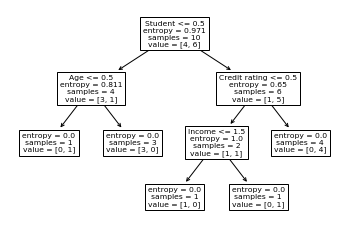

In [51]:
tree.plot_tree(tree1,feature_names=X.columns)
